In [24]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

In [25]:
raw_data_file = '1year.arff'
raw_data_path = '../data/01_raw/'

In [26]:
data = arff.loadarff(raw_data_path + raw_data_file)
df = pd.DataFrame(data[0])
target = 'class'
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


In [27]:
X = df.drop(target, axis=1)  # pozbywamy się kolumny docelowej
y = df[target]  # nasza kolumna docelowa

# Przekształcamy etykiety z bajtów na liczby całkowite
y = y.apply(lambda x: int(x.decode('utf-8')))

wykres korelacji cech


/var/folders/p1/dql2s7650jqg6q1h81txqczc0000gn/T/ipykernel_1294/1432014924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5})  # zmniejszamy rozmiar czcionki etykiet


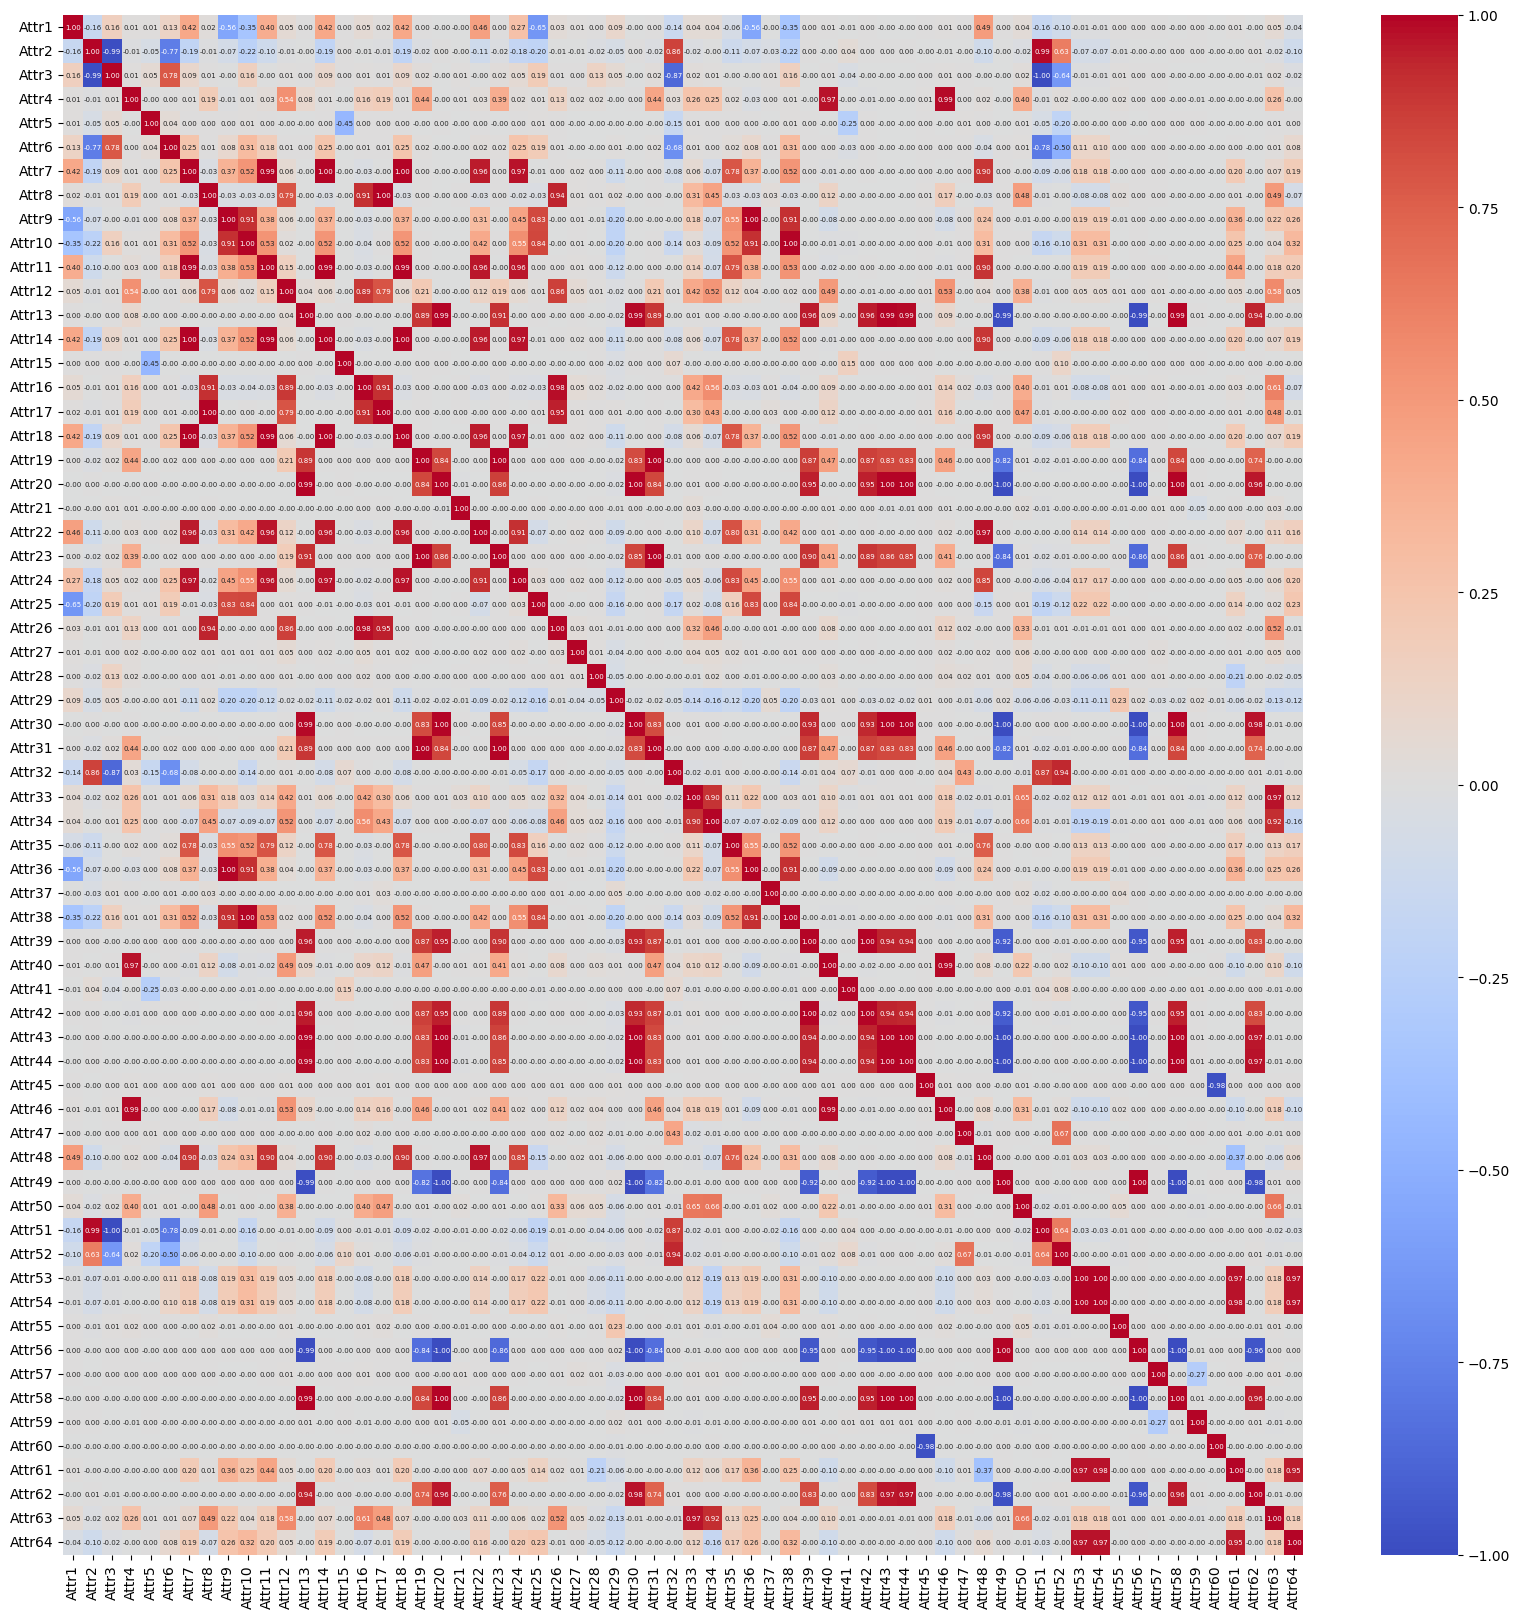

In [28]:
plt.figure(figsize=(20, 20))  # zwiększamy rozmiar wykresu
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5})  # zmniejszamy rozmiar czcionki etykiet
plt.show()

In [44]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Get feature importances from the model
feature_importances = clf.feature_importances_

# Create a dataframe to store the features and their importance
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display top 10 features
feature_importances_df.head(10)

/Users/vilis/Documents/Notebook/Polish-bankruptcy-companies/venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


,Feature,Importance
33,Attr34,0.067213
10,Attr11,0.057314
26,Attr27,0.045313
8,Attr9,0.038220
43,Attr44,0.034661
5,Attr6,0.030162
55,Attr56,0.029759
0,Attr1,0.024523
18,Attr19,0.024308
4,Attr5,0.021957


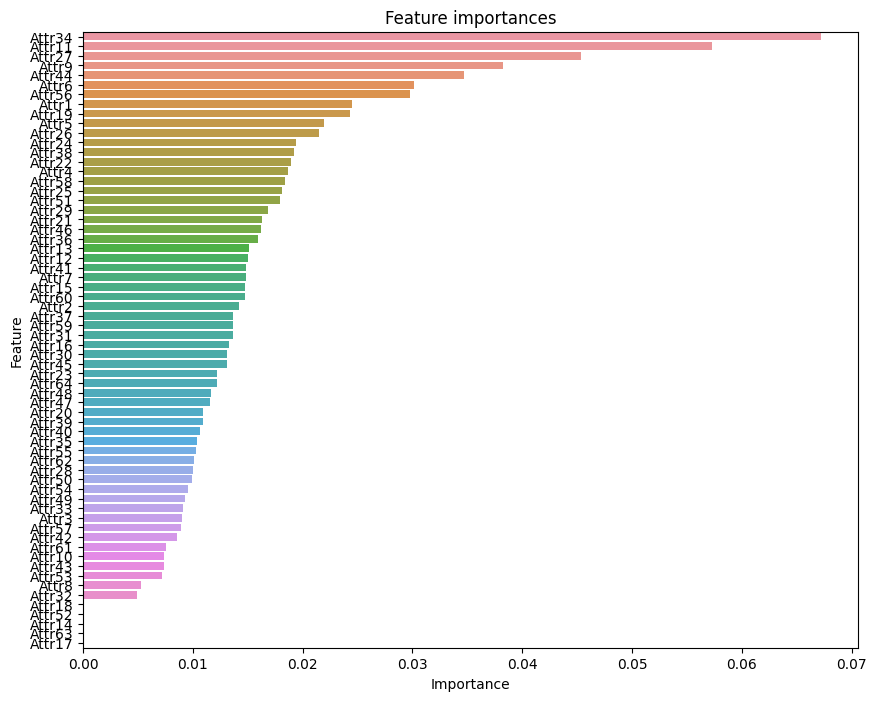

In [56]:
# wykres ważności cech
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature importances')
plt.show()

In [40]:
# Retrain the model using top 10 features

# Select top 10 features
top_10_features = feature_importances_df['Feature'].head(10).values

# Select these features from the original data
X_train_top_10 = X_train[top_10_features]
X_test_top_10 = X_test[top_10_features]

# Train the model on top 10 features
clf_top_10 = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
clf_top_10.fit(X_train_top_10, y_train)

# Get feature importances from the model
feature_importances_top_10 = clf_top_10.feature_importances_

# Create a dataframe to store the features and their importance
feature_importances_top_10_df = pd.DataFrame({
    'Feature': X_train_top_10.columns,
    'Importance': feature_importances_top_10
})

# Sort the dataframe by importance
feature_importances_top_10_df.sort_values(by='Importance', ascending=False, inplace=True)

# Make predictions on the test set
y_pred_top_10 = clf_top_10.predict(X_test_top_10)

# Calculate and print metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_top_10))
print("Recall: ", recall_score(y_test, y_pred_top_10))
print("F1-Score: ", f1_score(y_test, y_pred_top_10))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_top_10))


# Display top 10 features
feature_importances_top_10_df.head(10)

/Users/vilis/Documents/Notebook/Polish-bankruptcy-companies/venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy:  0.9857752489331437
Recall:  0.6470588235294118
F1-Score:  0.7674418604651163
ROC AUC Score:  0.822791404384632


,Feature,Importance
1,Attr11,0.147487
2,Attr27,0.135670
0,Attr34,0.135407
5,Attr6,0.124693
3,Attr9,0.095544
6,Attr56,0.092887
7,Attr1,0.077096
9,Attr5,0.073794
8,Attr19,0.060735
4,Attr44,0.056687


In [42]:
# Import required libraries
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Retrain the model using top 20 features

# Select top 20 features
top_20_features = feature_importances_df['Feature'].head(20).values

# Select these features from the original data
X_train_top_20 = X_train[top_20_features]
X_test_top_20 = X_test[top_20_features]

# Train the model on top 20 features
clf_top_20 = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
clf_top_20.fit(X_train_top_20, y_train)

# Get feature importances from the model
feature_importances_top_20 = clf_top_20.feature_importances_

# Create a dataframe to store the features and their importance
feature_importances_top_20_df = pd.DataFrame({
    'Feature': X_train_top_20.columns,
    'Importance': feature_importances_top_20
})

# Sort the dataframe by importance
feature_importances_top_20_df.sort_values(by='Importance', ascending=False, inplace=True)

# Make predictions on the test set
y_pred_top_20 = clf_top_20.predict(X_test_top_20)

# Calculate and print metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_top_20))
print("Recall: ", recall_score(y_test, y_pred_top_20))
print("F1-Score: ", f1_score(y_test, y_pred_top_20))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_top_20))

# Display top 20 features
feature_importances_top_20_df.head(20)

/Users/vilis/Documents/Notebook/Polish-bankruptcy-companies/venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy:  0.9871977240398293
Recall:  0.6862745098039216
F1-Score:  0.7954545454545455
ROC AUC Score:  0.842399247521887


,Feature,Importance
1,Attr11,0.111932
3,Attr9,0.091448
0,Attr34,0.081822
2,Attr27,0.079784
5,Attr6,0.063598
15,Attr58,0.051353
7,Attr1,0.048037
6,Attr56,0.044966
8,Attr19,0.043891
19,Attr21,0.040489


In [45]:
# Retrain the model using top 30 features

# Select top 30 features
top_30_features = feature_importances_df['Feature'].head(30).values

# Select these features from the original data
X_train_top_30 = X_train[top_30_features]
X_test_top_30 = X_test[top_30_features]

# Train the model on top 30 features
clf_top_30 = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
clf_top_30.fit(X_train_top_30, y_train)

# Get feature importances from the model
feature_importances_top_30 = clf_top_30.feature_importances_

# Create a dataframe to store the features and their importance
feature_importances_top_30_df = pd.DataFrame({
    'Feature': X_train_top_30.columns,
    'Importance': feature_importances_top_30
})

# Sort the dataframe by importance
feature_importances_top_30_df.sort_values(by='Importance', ascending=False, inplace=True)


# Make predictions on the test set
y_pred_top_30 = clf_top_30.predict(X_test_top_30)

# Calculate and print metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_top_30))
print("Recall: ", recall_score(y_test, y_pred_top_30))
print("F1-Score: ", f1_score(y_test, y_pred_top_30))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_top_30))

# Display top 30 features
feature_importances_top_30_df.head(30)

/Users/vilis/Documents/Notebook/Polish-bankruptcy-companies/venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy:  0.9871977240398293
Recall:  0.6862745098039216
F1-Score:  0.7954545454545455
ROC AUC Score:  0.842399247521887


,Feature,Importance
0,Attr34,0.087184
1,Attr11,0.083099
2,Attr27,0.062600
3,Attr9,0.057604
5,Attr6,0.053067
4,Attr44,0.046646
10,Attr26,0.042177
6,Attr56,0.041454
19,Attr21,0.034881
15,Attr58,0.031745


In [55]:
# Get top 10, 20, 30 features
top_10_features = feature_importances_top_10_df.sort_values(by='Importance', ascending=False).reset_index()['Feature'].values
top_20_features = feature_importances_top_20_df.sort_values(by='Importance', ascending=False).reset_index()['Feature'].values
top_30_features = feature_importances_top_30_df.sort_values(by='Importance', ascending=False).reset_index()['Feature'].values


# Create a dictionary to hold the scores
feature_scores = {}

# Assign points for appearing in top 10, 20, 30 features
for feature in top_10_features:
    feature_scores[feature] = feature_scores.get(feature, 0) + 3
    
for feature in top_20_features:
    feature_scores[feature] = feature_scores.get(feature, 0) + 2

for feature in top_30_features:
    feature_scores[feature] = feature_scores.get(feature, 0) + 1

# Convert the dictionary to a DataFrame
feature_scores_df = pd.DataFrame({
    'Feature': list(feature_scores.keys()),
    'Score': list(feature_scores.values())
})

# Sort the DataFrame by score
feature_scores_df.sort_values(by='Score', ascending=False, inplace=True)

# Display the DataFrame
print(feature_scores_df)

list_of_rows = feature_scores_df.values.tolist()


l = [list_of_rows[i][0] for i in range(len(list_of_rows)) if list_of_rows[i][1] >= 3]

print(l)
    


   Feature  Score
0   Attr11      6
1   Attr27      6
2   Attr34      6
3    Attr6      6
4    Attr9      6
5   Attr56      6
6    Attr1      6
7    Attr5      6
8   Attr19      6
9   Attr44      6
19  Attr51      3
18  Attr22      3
17   Attr4      3
16  Attr24      3
15  Attr25      3
14  Attr38      3
13  Attr26      3
12  Attr29      3
11  Attr21      3
10  Attr58      3
20   Attr7      1
21  Attr12      1
22  Attr41      1
23  Attr60      1
24  Attr37      1
25  Attr46      1
26  Attr36      1
27  Attr15      1
28   Attr2      1
29  Attr13      1
['Attr11', 'Attr27', 'Attr34', 'Attr6', 'Attr9', 'Attr56', 'Attr1', 'Attr5', 'Attr19', 'Attr44', 'Attr51', 'Attr22', 'Attr4', 'Attr24', 'Attr25', 'Attr38', 'Attr26', 'Attr29', 'Attr21', 'Attr58']


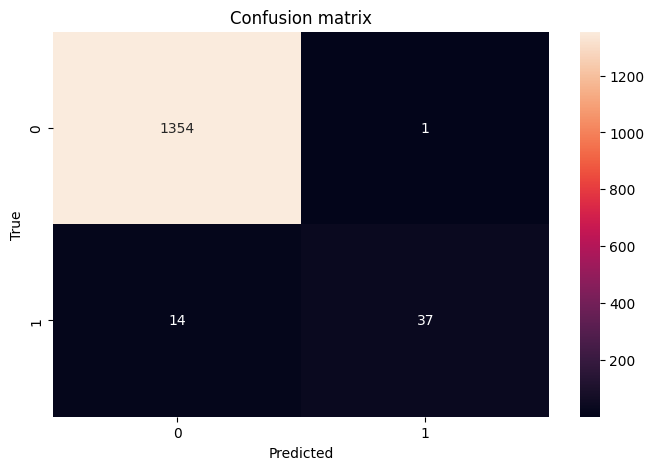

In [9]:
# wykres macierzy pomyłek
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- 1354 przypadki zostały poprawnie zaklasyfikowane jako pierwsza klasa zarówno w rzeczywistości, jak i w przewidywaniach modelu.
- 1 przypadek został błędnie przewidziany jako druga klasa, podczas gdy w rzeczywistości była to pierwsza klasa.
- 14 przypadków zostało błędnie przewidzianych jako pierwsza klasa, podczas gdy w rzeczywistości była to druga klasa.
- 37 przypadków zostało poprawnie zaklasyfikowanych jako druga klasa zarówno w rzeczywistości, jak i w przewidywaniach modelu.